**PROJECT OVERVIEW: TO PREDICT SPECIFIC ENTHALPY(H) OF SUPERHEATED STEAM BASED ON THE SAMPLE OF REAL DATASET OBTAINED FROM LITERATURE USING REGRESSION TECHNIQUES OF MACHINE LEARNING**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [ ]:
dataset = pd.read_csv("superheated_steam_real_dataset.csv")

In [ ]:
print(dataset.head(10))

   P_kPa  T_sat_C  T_C          V       U       H       S
0    1.0     6.98   75  12900.000  2020.0  2552.3  8.3186
1    1.0     6.98  100  10480.000  1721.0  2585.0  8.4462
2    1.0     6.98  125   8610.000  1897.0  2736.0  8.5722
3    1.0     6.98  150   7200.000  1952.0  2783.7  8.6888
4    1.0     6.98  175   6150.000  2061.0  2831.7  8.7994
5    1.0     6.98  200   5330.000  2150.0  2880.1  8.9058
6    1.0     6.98  225   4670.000  2298.0  2928.7  9.0100
7    1.0     6.98  250   4140.000  2413.0  2977.7  9.1010
8   10.0    45.83   75     11.002  1467.0  2499.1  7.7904
9   10.0    45.83  100     10.577  1791.0  2551.6  8.3168


In [ ]:
dataset.describe()

,P_kPa,T_sat_C,T_C,V,U,H,S
count,136.000000,136.000000,136.000000,102.000000,102.000000,102.000000,102.000000
mean,125.136765,94.111176,162.500000,1679.931427,3534.217647,2881.771569,8.374042
std,95.121346,33.344147,57.493961,2174.753709,746.887114,126.390006,0.464021
min,1.000000,6.980000,75.000000,4.045000,1467.000000,2499.100000,7.690500
25%,40.000000,75.890000,118.750000,478.500000,3204.750000,2835.175000,8.132075
50%,101.325000,100.000000,162.500000,861.000000,3643.000000,2898.650000,8.298800
75%,200.000000,120.230000,206.250000,2248.500000,4147.000000,2991.375000,8.508500
max,300.000000,133.540000,250.000000,12900.000000,4564.000000,3039.400000,10.637000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   P_kPa    136 non-null    float64
 1   T_sat_C  136 non-null    float64
 2   T_C      136 non-null    int64  
 3   V        102 non-null    float64
 4   U        102 non-null    float64
 5   H        102 non-null    float64
 6   S        102 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 7.6 KB


In [ ]:
dataset.isnull().sum().sum()

np.int64(136)

In [ ]:
dataset.duplicated().sum()

np.int64(0)

In [ ]:
dataset.dropna(inplace=True)
dataset.isnull().sum().sum()

np.int64(0)

**Created a model on specific enthalpy 'H'**

In [ ]:
X = dataset.drop('H', axis=1)
y = dataset['H']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("here is the  y train :", y_train)

here is the  y train : 11     2655.5
135    3039.4
62     2991.9
28     2894.8
77     2945.4
        ...  
70     2992.0
87     3039.0
14     2808.1
123    2853.8
55     3038.3
Name: H, Length: 71, dtype: float64


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([2970.90770724, 2845.83846008, 2844.66169919, 2838.21139398,
       2877.81948973, 2780.65897639, 2999.11612902, 3029.44078018,
       2639.8178483 , 2673.75013445, 2673.20063201, 3020.24004425,
       2831.95596039, 3001.79943702, 3057.33684438, 2797.62308311,
       2950.40315645, 2783.00893573, 2713.82561564, 2785.73077156,
       2991.44907809, 2893.04342649, 2895.9637146 , 2898.00606775,
       2978.23700232, 2884.93202029, 2841.33331817, 2898.45176075,
       2733.93404886, 2608.02243167, 2948.5652886 ])

**Predicting model accurancy based on R2 value, Mean-absolute error and Mean square error values**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean absolute error: {mae:.2f}')

Mean Squared Error: 862.28
R-squared: 0.95
Mean absolute error: 18.41


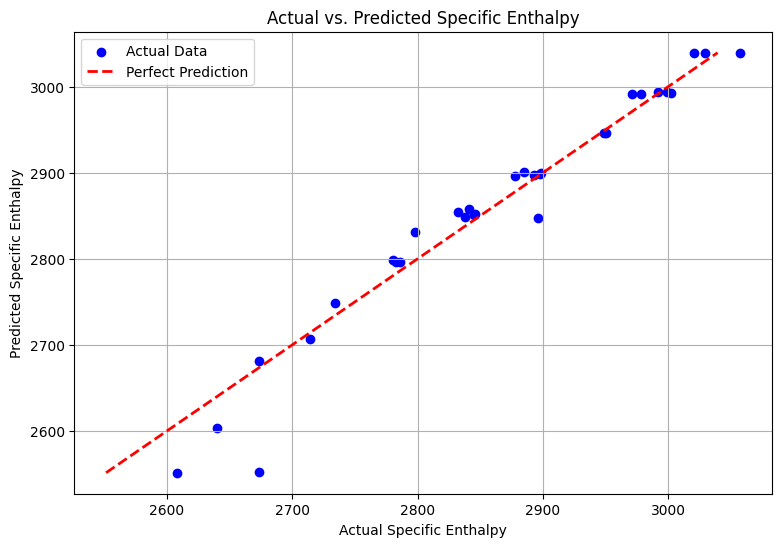

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(y_pred, y_test, color='blue', label='Actual Data')
lims = [min(y_test.min(), y_test.min()), max(y_test.max(), y_test.max())]
plt.plot(lims, lims, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Specific Enthalpy')
plt.ylabel('Predicted Specific Enthalpy')
plt.title('Actual vs. Predicted Specific Enthalpy')
plt.legend()
plt.grid(True)
plt.show()

**As depicted from the graphy above, we can infer that linear regression is not a very good model for prediction of specific enthalpy of steam. So we should explore other techniques for better accuracy.**

**Applying polynomial regression now on the original dataset**

In [ ]:
Degree = 2
poly = PolynomialFeatures(degree=Degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)      #100% X data is converted here with polynomial form.

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_pred = model.predict(X_test_poly)

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Degree {Degree} Polynomial Regression results")
print(f"Test results MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, R²: {r2_test:.2f}")

Degree 2 Polynomial Regression results
Test results MSE: 881.01, MAE: 8.18, R²: 0.95


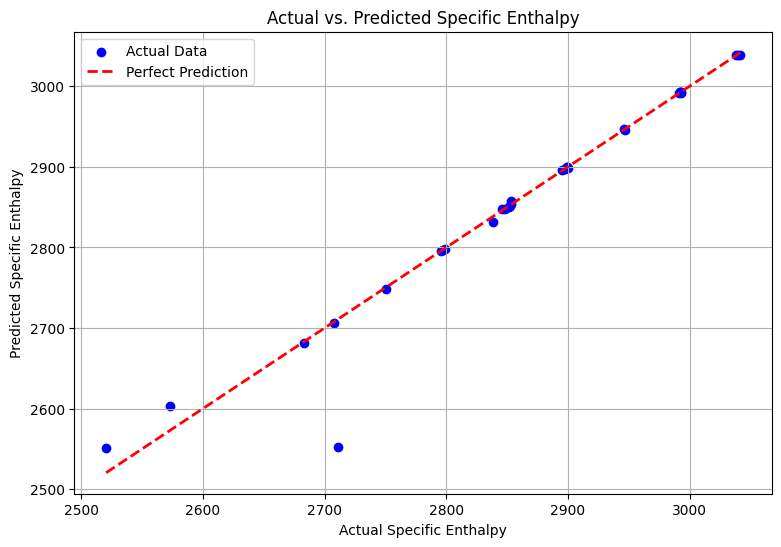

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test_pred, y_test, color='blue', label='Actual Data')
#plt.plot(y_test_pred, y_test, color='red', label='Regression Line', linewidth=1)
lims = [min(y_test.min(), y_test_pred.min()), max(y_test.max(), y_test_pred.max())]
plt.plot(lims, lims, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Specific Enthalpy')
plt.ylabel('Predicted Specific Enthalpy')
plt.title('Actual vs. Predicted Specific Enthalpy')
plt.legend()
plt.grid(True)
plt.show()

**From the above graph, we can infer that polynomial regression with degree 2 is a better model for predicting specific enthalpy(H) as compared to simple linear regression**

**Application of elastic net regression with polynomial features now**

In [ ]:


elastic_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("elastic_net", ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000))
])

**Tuning also is possible here with gridsearchCV, lower alpha prevents regularisation. l1_ratio is the balance knob between Ridge and Lasso.**

In [ ]:
elastic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('elastic_net',
                 ElasticNet(alpha=0.1, max_iter=10000, random_state=42))])

In [ ]:
y_pred_elastic = elastic_pipeline.predict(X_test)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred_elastic))
print("MSE:", mean_squared_error(y_test, y_pred_elastic))
print("MAE:", mean_absolute_error(y_test, y_pred_elastic))

R² Score: 0.9916021537611677
MSE: 146.98649480196065
MAE: 8.742325121123647


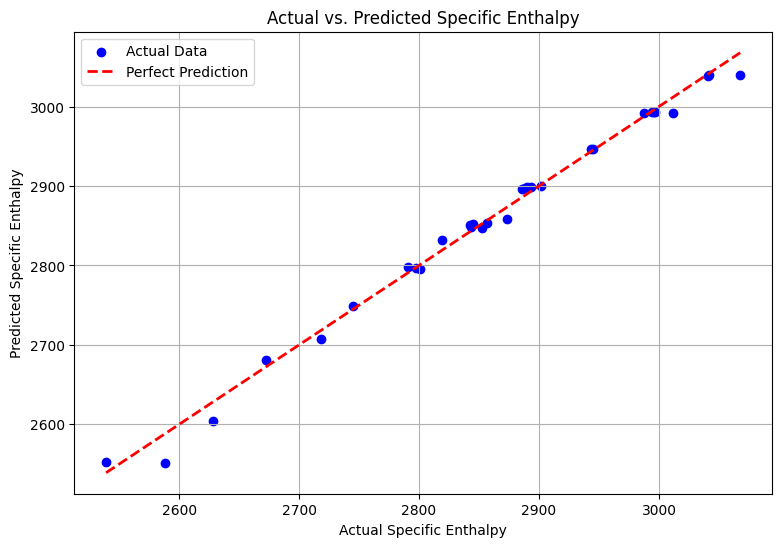

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(y_pred_elastic, y_test, color='blue', label='Actual Data')
#plt.plot(y_pred_elastic, y_test, color='red', label='Regression Line', linewidth=1)
lims = [min(y_test.min(), y_pred_elastic.min()), max(y_test.max(), y_pred_elastic.max())]
plt.plot(lims, lims, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Specific Enthalpy')
plt.ylabel('Predicted Specific Enthalpy')
plt.title('Actual vs. Predicted Specific Enthalpy')
plt.legend()
plt.grid(True)
plt.show()

**Inference of the project: Elastic net regression model is the best model to predict the specific enthalpy of superheated steam as comapred to simple linear and polynomial regression based on statistical error results amd prediction accuracy.**